# Geely Auto - Linear Regression

### Problem Statement

> A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 


### Business Understanding

Geely Auto have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car.

2. How well those variables describe the price of a car.


Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market. 

### Reading the data

In [1]:
# Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Let us read the file
df = pd.read_csv('CarPrice_Assignment.csv')

# Displaying top5 rows of the created dataframe
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#Performing basic analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
#Shape of the data
df.shape

(205, 26)

In [6]:
# Describing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [7]:
# Let us check if there are any null values in the data
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**The dataset looks clean let us continue our analysis**

#### As per the given guidelines, we have to consider only the company name in the given data

In [8]:
# Let us create a copy dataframe

cars = df.copy()

In [9]:
# Exploring the columns
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
# CarName
cars[['CarName']] #We have the manufacturer name and the name of the car itself in the given data

,CarName
0,alfa-romero giulia
1,alfa-romero stelvio
2,alfa-romero Quadrifoglio
3,audi 100 ls
4,audi 100ls
...,...
200,volvo 145e (sw)
201,volvo 144ea
202,volvo 244dl
203,volvo 246


In [11]:
#  Let us take only the manufacturer(Company) name

Manufacturer = cars['CarName'].apply(lambda x: x.split(' ')[0]) # Splitting the CarName after a 'space' and selecting the first string value
cars.insert(3,'Company',Manufacturer) # Inserting the newly created column in the '3rd' column of the dataframe

cars.drop(['CarName'], axis = 1, inplace = True) # Dropping the CarName column as we have extracted the Complany Name
cars.head()

,car_ID,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
#Inspecting newly created Company column
cars['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some mistakes in the names of the cars, let us fix them

In [13]:
#Capitalize first letter in the string

cars['Company'] = cars['Company'].str.capitalize()

In [14]:
cars['Company'].unique() # Nissan and nissan are taken care of, after capitalizing first letter

array(['Alfa-romero', 'Audi', 'Bmw', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Maxda', 'Mazda', 'Buick', 'Mercury',
       'Mitsubishi', 'Nissan', 'Peugeot', 'Plymouth', 'Porsche',
       'Porcshce', 'Renault', 'Saab', 'Subaru', 'Toyota', 'Toyouta',
       'Vokswagen', 'Volkswagen', 'Vw', 'Volvo'], dtype=object)

There are missplet names in these above company names, let us fix this

In [15]:
cars['Company'] = cars['Company'].replace('Maxda','Mazda')
cars['Company'] = cars['Company'].replace('Porcshce','Porsche')
cars['Company'] = cars['Company'].replace('Toyouta','Toyota')
cars['Company'] = cars['Company'].replace('Vokswagen','Volkswagen')
cars['Company'] = cars['Company'].replace('Vw','Volkswagen')

In [16]:
cars['Company'].unique()

array(['Alfa-romero', 'Audi', 'Bmw', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Mazda', 'Buick', 'Mercury', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab',
       'Subaru', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

Misspelt names are fixed

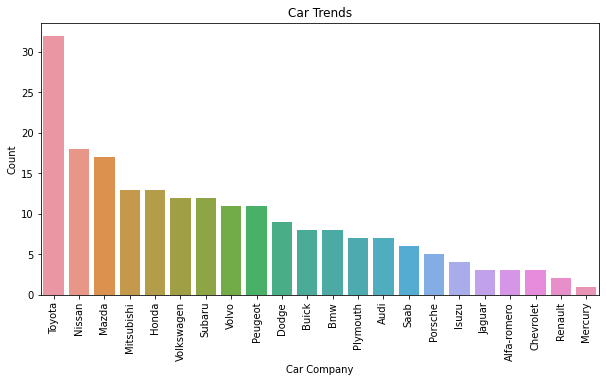

In [17]:
# Plotting the Company names to see the trend in the data
plt.figure(figsize = (10,5))
sns.countplot(cars['Company'], order = cars['Company'].value_counts().index)
plt.xlabel('Car Company')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Car Trends')
plt.show()

**Toyota has sold maximum cars and Mercury being the lowest sold**

# Exploratory Analysis

### Price (Target Variable)

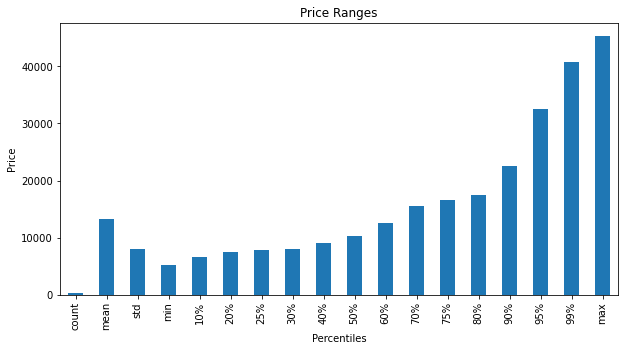

In [18]:
plt.figure(figsize = (10,5))
cars['price'].describe(percentiles=[0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.95,0.99]).plot(kind='bar')
plt.xlabel('Percentiles')
plt.ylabel('Price')
plt.title('Price Ranges')
plt.show()

Inference: A sudden increase in the price of the cars after 90 percentile.

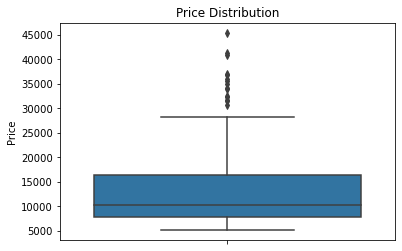

In [19]:
sns.boxplot(cars['price'], orient = 'v')
plt.title('Price Distribution')
plt.ylabel('Price')
plt.show()

### Symboling

- Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

In [20]:
cars['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

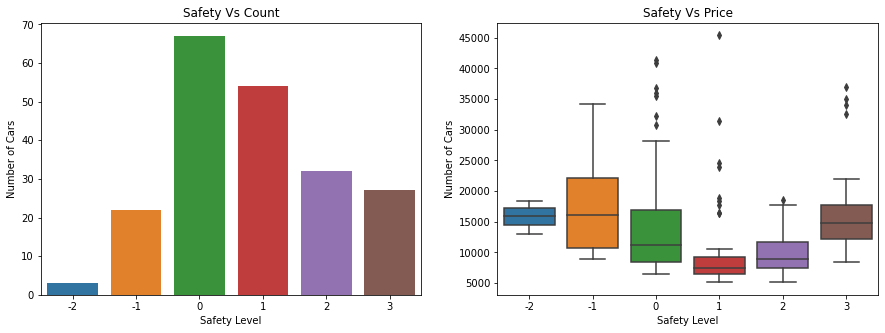

In [21]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(cars['symboling']) # plotting number of cars with respect to symboling level
plt.xlabel('Safety Level')
plt.ylabel('Number of Cars')
plt.title('Safety Vs Count')

plt.subplot(1,2,2)
sns.boxplot(data=cars, x='symboling',y ='price') # Comparing safeness with price factor
plt.xlabel('Safety Level')
plt.ylabel('Number of Cars')
plt.title('Safety Vs Price')
plt.show()

Inference: **Safer Cars costs most**

### Company

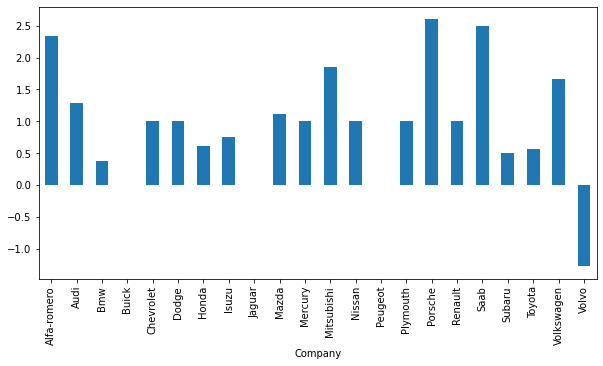

In [22]:
plt.figure(figsize=(10,5))
cars.groupby('Company')['symboling'].mean().plot(kind='bar') # Company and it's priority to safeness

**Volvo is clear winner in terms of Safety Standards followed by Peugeot, Jaguar, Buick**

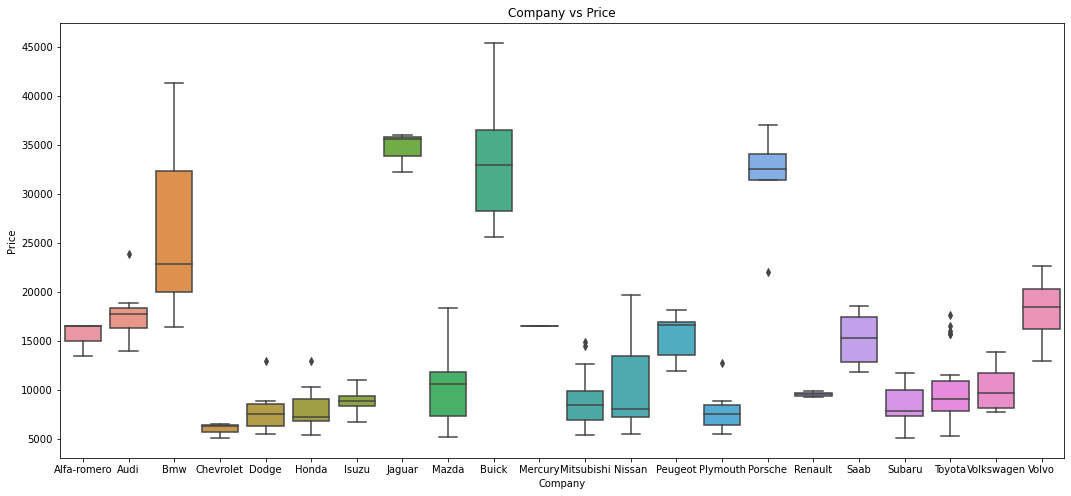

In [23]:
plt.figure(figsize=(18,8))
sns.boxplot(data=cars,x='Company', y= 'price')
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Company vs Price')
plt.show()

**Buick costs more followed by BMW, Porsche and Jaguar**

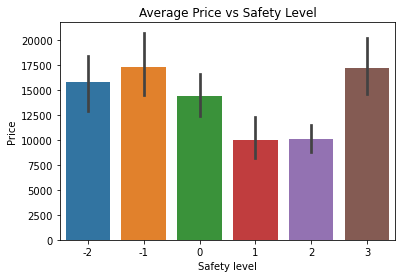

In [24]:
sns.barplot(data=cars,x='symboling',y='price') # Cost of the cars w.r.t symboling level
plt.xlabel('Safety level')
plt.ylabel('Price')
plt.title('Average Price vs Safety Level')
plt.show()

### FuelType

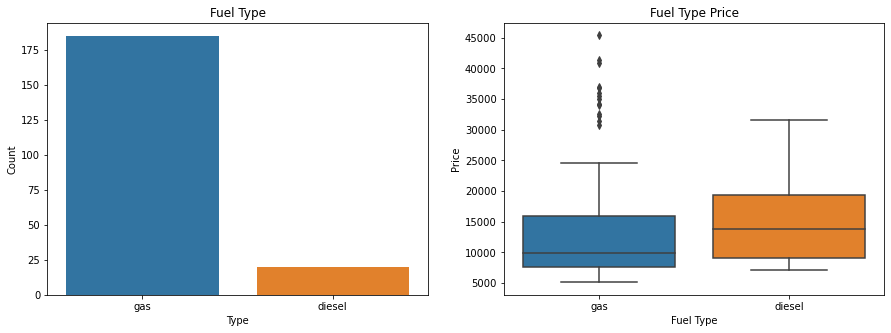

In [25]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(cars['fueltype']) #category of fueltype in cars
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Fuel Type')

plt.subplot(1,2,2)
sns.boxplot(data=cars, x='fueltype', y = 'price') # Cost of fueltype cars
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Fuel Type Price')
plt.show()

**Gas cars are sold most, but Diesel car costs more**

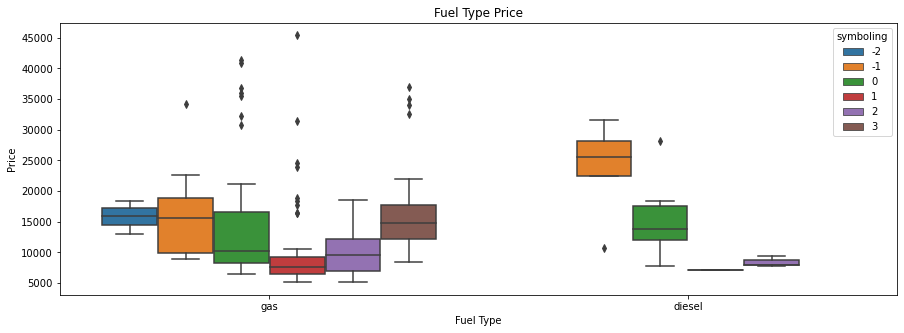

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(data=cars, x='fueltype', y = 'price', hue = 'symboling') # adding saftey levels w.r.t fueltype
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.title('Fuel Type Price')
plt.show()

**Gas cars have wide variety of cars compared to diesel, as diesel cars have cars in safer symboling levels, it can be considered as much safer to gas cars**

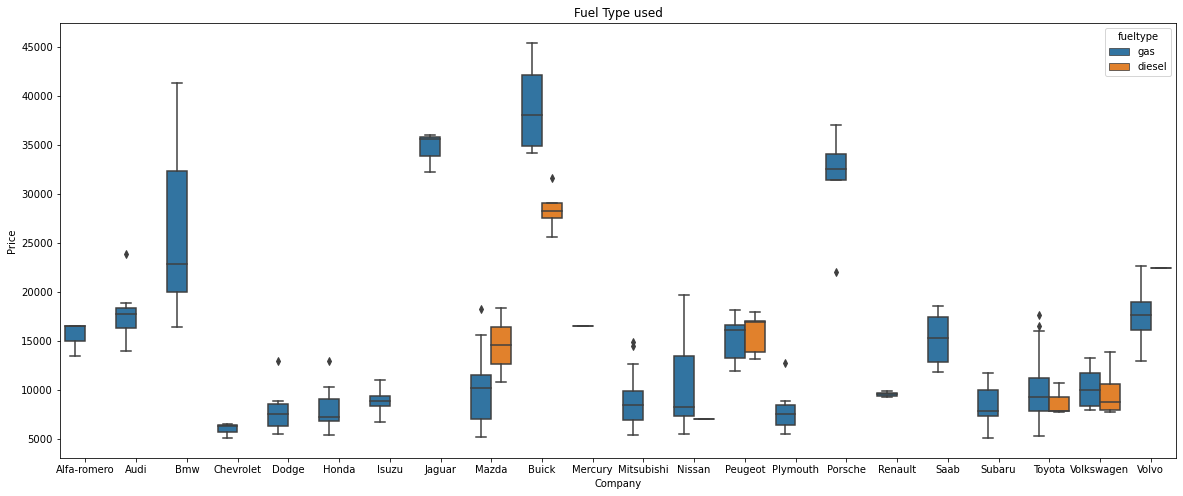

In [27]:
# Plotting preferred fueltype choice for the manufacturers
plt.figure(figsize=(20,8))
sns.boxplot(data=cars, x='Company', y = 'price', hue = 'fueltype')
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Fuel Type used')
plt.show()

**Most of the Car Company prefers Gas cars over diesel cars**

### Aspiration

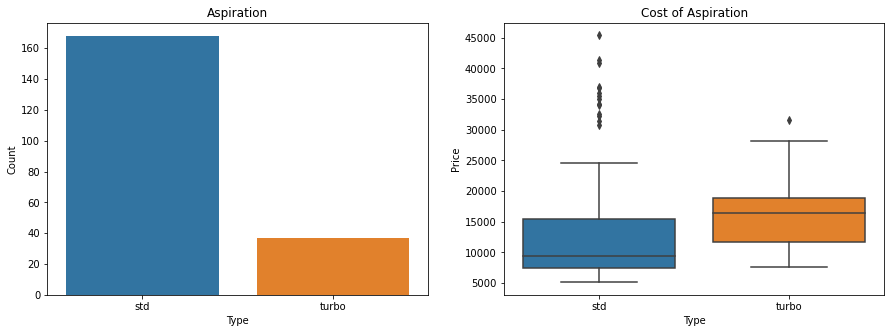

In [28]:
# Aspiration refers to the combustion type used in cars

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(cars['aspiration'])
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Aspiration')

plt.subplot(1,2,2)
sns.boxplot(data=cars, x='aspiration', y='price')
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Cost of Aspiration')
plt.show()

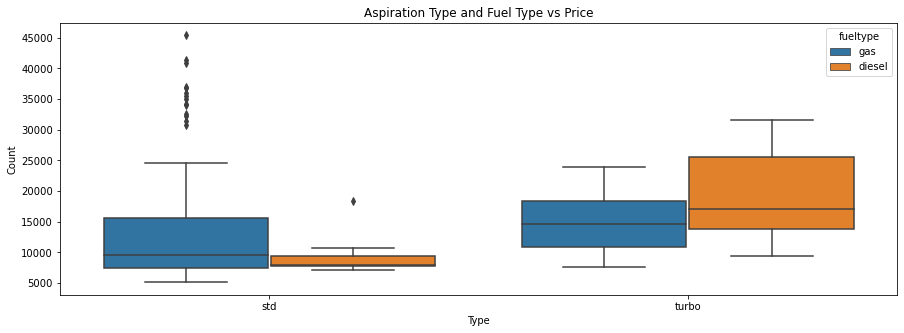

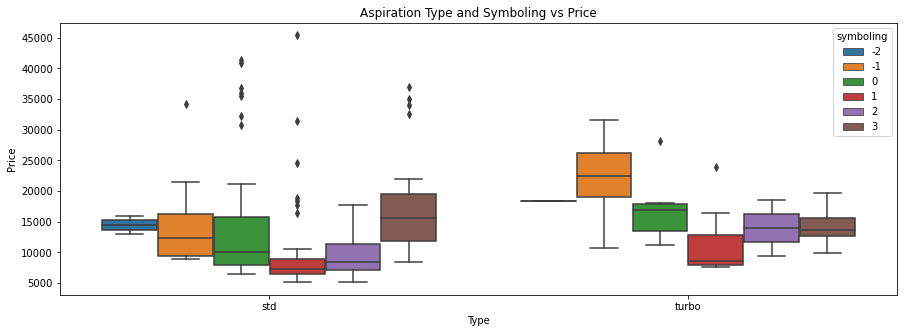

In [29]:
plt.figure(figsize = (15,5))
sns.boxplot(data=cars, x='aspiration', y='price', hue='fueltype') # Aspiration w.r.t Fueltype
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Aspiration Type and Fuel Type vs Price')
plt.show()

plt.figure(figsize = (15,5))
sns.boxplot(data=cars, x='aspiration', y='price', hue='symboling') # Saftey levels in Aspiration
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Aspiration Type and Symboling vs Price')
plt.show()

### Inference
- Diesel car costs more becasue of `Turbo` Aspiration Type
- Price ranges of Safer cars is in the lower side of the price chart in `Standard` Aspiration type

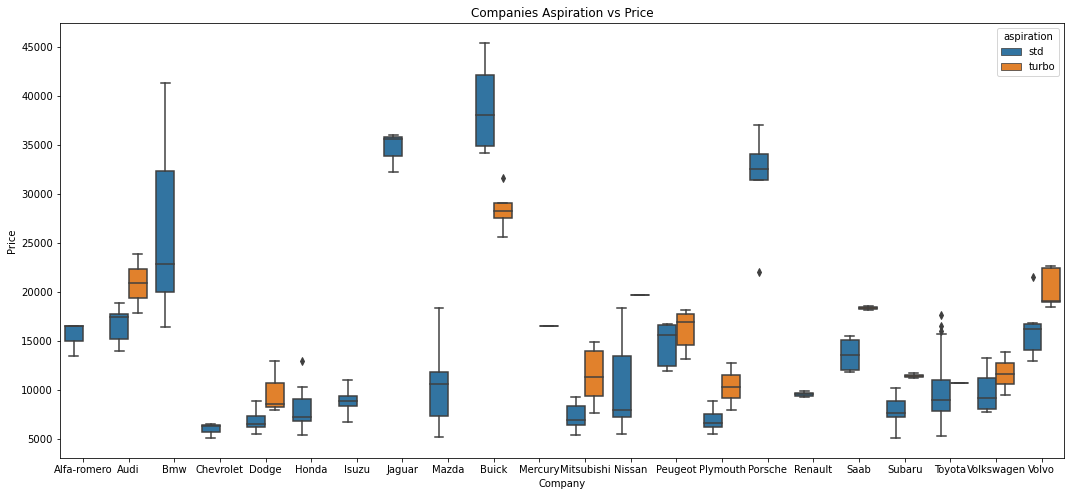

In [30]:
plt.figure(figsize = (18,8))
sns.boxplot(data=cars, x='Company', y='price', hue='aspiration')
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Companies Aspiration vs Price')
plt.show()

**Standard Cars are more when compared to Turbo**

### DoorNumber

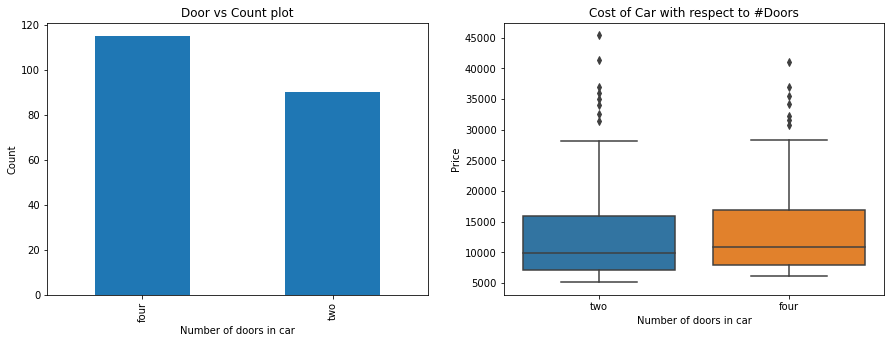

In [31]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
cars['doornumber'].value_counts().plot(kind='bar')
plt.xlabel('Number of doors in car')
plt.ylabel('Count')
plt.title('Door vs Count plot')

plt.subplot(1,2,2)
sns.boxplot(data=cars,x='doornumber',y='price')
plt.xlabel('Number of doors in car')
plt.ylabel('Price')
plt.title('Cost of Car with respect to #Doors')
plt.show()

**Four Door cars are more in number, cost wise there is no significant difference**

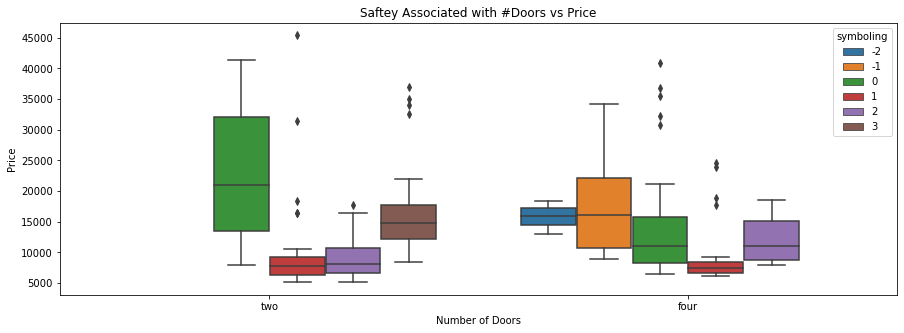

In [32]:
plt.figure(figsize = (15,5))
sns.boxplot(data=cars, x='doornumber', y='price', hue='symboling')
plt.xlabel('Number of Doors')
plt.ylabel('Price')
plt.title('Saftey Associated with #Doors vs Price')
plt.show()

**Four door cars are much safe compared to Two Door cars**

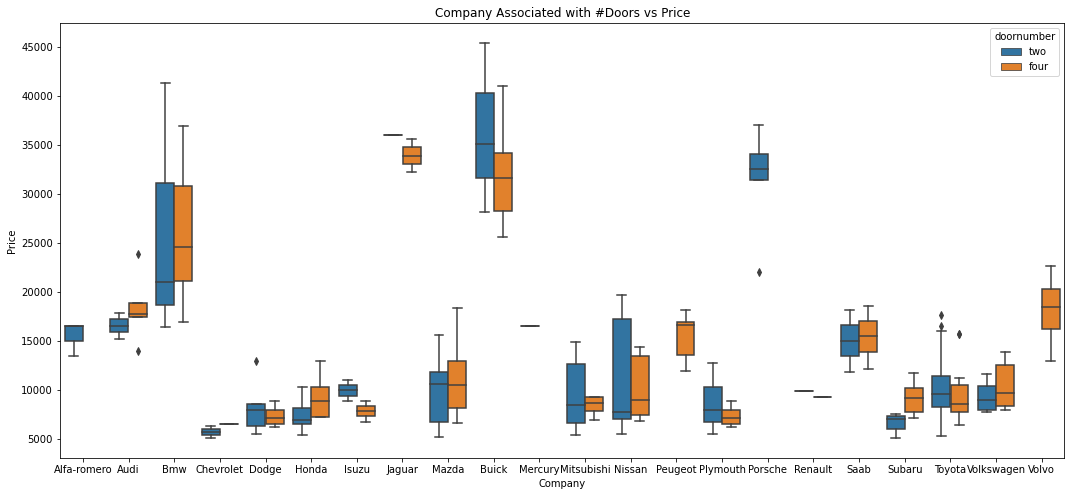

In [33]:
plt.figure(figsize = (18,8))
sns.boxplot(data=cars, x='Company', y='price', hue='doornumber')
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Company Associated with #Doors vs Price')
plt.show()

### Inference:
- Volvo does not have 2 door cars.
- Porsche has no 4 door cars.


### Car Body

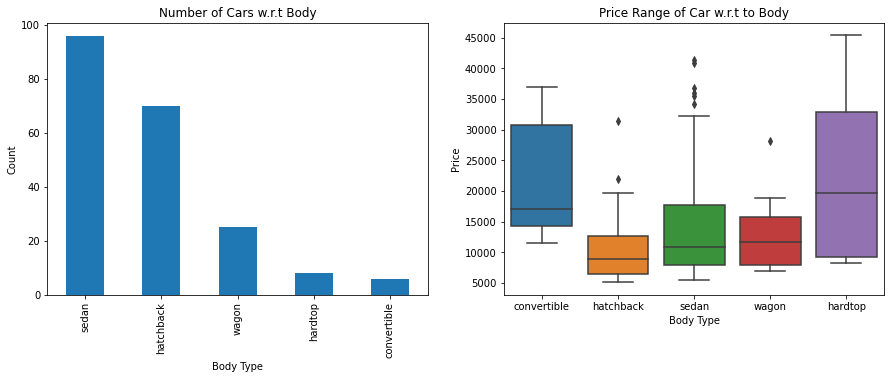

In [34]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
cars['carbody'].value_counts().plot(kind='bar')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.title('Number of Cars w.r.t Body')

plt.subplot(1,2,2)
sns.boxplot(data=cars, x='carbody', y='price')
plt.xlabel('Body Type')
plt.ylabel('Price')
plt.title('Price Range of Car w.r.t to Body')
plt.show()

**Hatchback,Wagon and Sedan are affordable because of the cost**

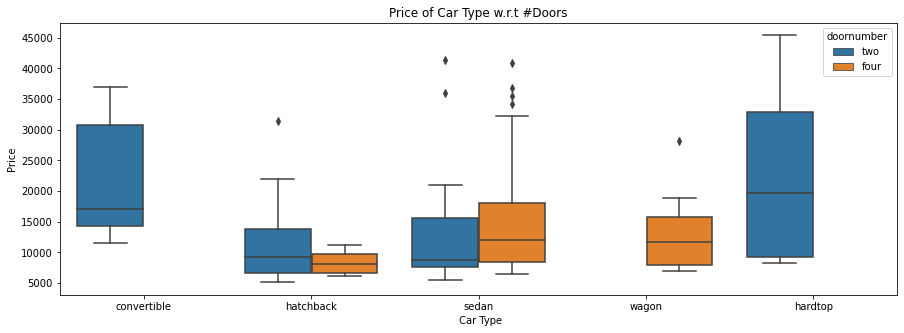

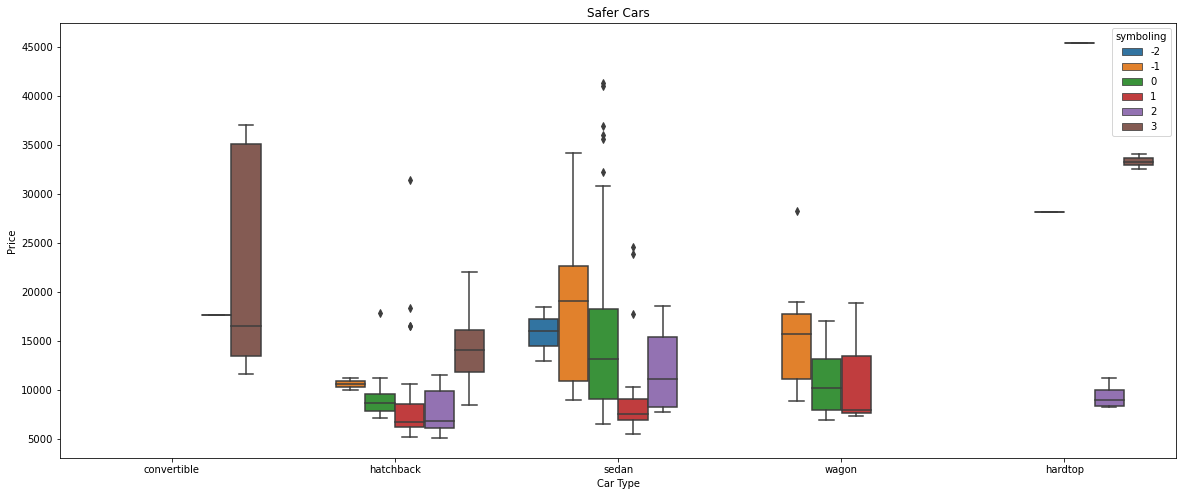

In [35]:
plt.figure(figsize = (15,5))
sns.boxplot(data=cars, x='carbody', y='price', hue='doornumber')
plt.xlabel(' Car Type')
plt.ylabel('Price')
plt.title('Price of Car Type w.r.t #Doors')
plt.show()

plt.figure(figsize = (20,8))
sns.boxplot(data=cars, x='carbody', y='price', hue='symboling')
plt.xlabel('Car Type')
plt.ylabel('Price')
plt.title('Safer Cars')
plt.show()

- Convertible and Hardtop cars are only 2 door cars.
- **The above plot gives solid evidence to `Safeness` of `Four Door` cars**

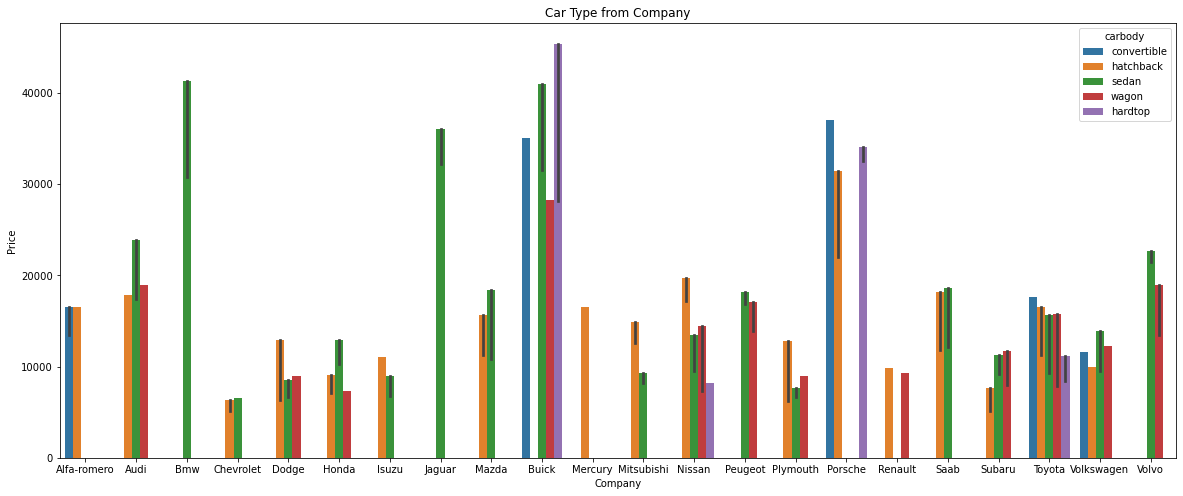

In [36]:
plt.figure(figsize = (20,8))
sns.barplot(data=cars, x='Company', y='price', hue='carbody', estimator = np.max)
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('Car Type from Company')
plt.show()

### Inference:
- Buick cars are of high cost for all the carbody ranges.
- Jaguar has only Sedan body type
- Mercury has only hatchback

### DriveWheel
> Drive represents the number of wheels to be driven
- fwd : Front Wheel drive
- rwd : Rear wheel drive
- 4wd : Four wheel drive

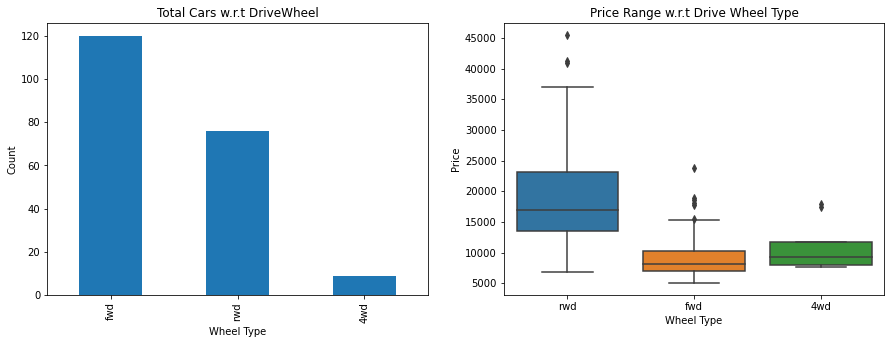

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
cars['drivewheel'].value_counts().plot(kind='bar')
plt.xlabel('Wheel Type')
plt.ylabel('Count')
plt.title('Total Cars w.r.t DriveWheel')

plt.subplot(1,2,2)
sns.boxplot(data=cars,x='drivewheel',y='price')
plt.xlabel('Wheel Type')
plt.ylabel('Price')
plt.title('Price Range w.r.t Drive Wheel Type')
plt.show()

### Inference:
- `rwd` costs more
- More `fwd` cars are sold

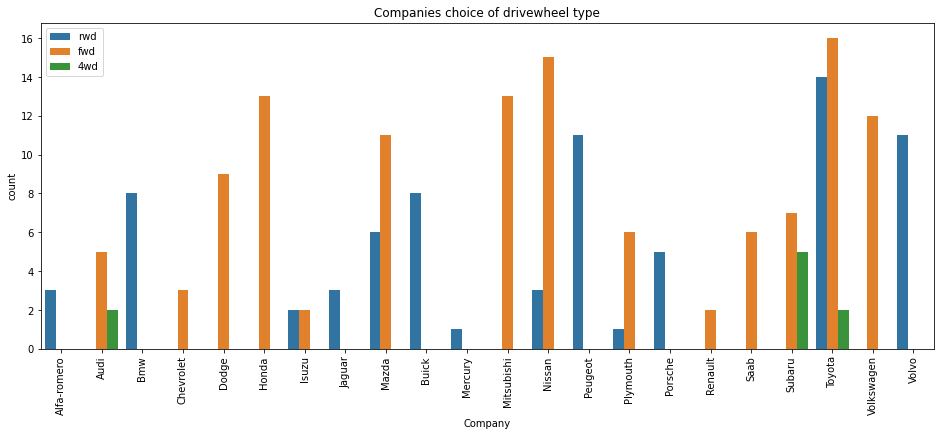

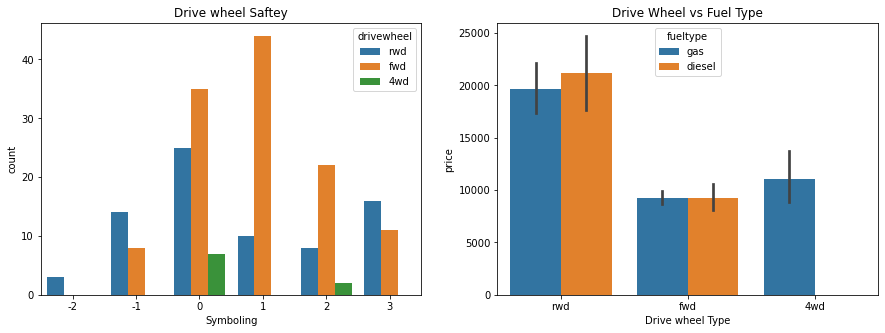

In [38]:
plt.figure(figsize = (16,6))

sns.countplot(data=cars, x='Company',hue='drivewheel') #Company assocaited with drivehweel
plt.xlabel('Company')
plt.title('Companies choice of drivewheel type')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(data=cars, x='symboling', hue='drivewheel') # Which type is safe?
plt.xlabel('Symboling')
plt.title('Drive wheel Saftey')

plt.subplot(1,2,2)
sns.barplot(data=cars, x='drivewheel',y = 'price', hue='fueltype') # Which fueltype is used ?
plt.xlabel('Drive wheel Type')
plt.title('Drive Wheel vs Fuel Type')
plt.show()

- `rwd` - Rear Wheel Drive
- `fwd` - Forward/Front Wheel Drive
- `4wd` - Four Wheel drive


1. **From Drive Wheel safety plot, rwd is considerably safe.**
2. **Volvo, Puegeot, Buick and BMW prefers rwd cars.**
3. **Audi, Subaru and Toyota has 4wd**

### Engine Location

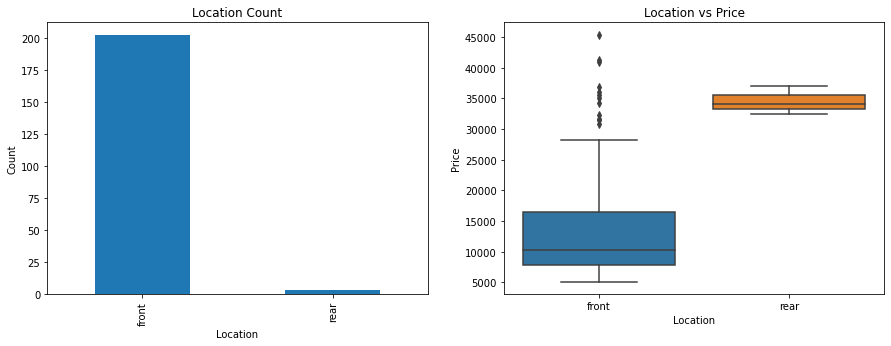

In [39]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
cars['enginelocation'].value_counts().plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Location Count')

plt.subplot(1,2,2)
sns.boxplot(data=cars,x='enginelocation', y='price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Location vs Price')
plt.show()

**Front engine cars are sold more, but rear engine cars cost more**

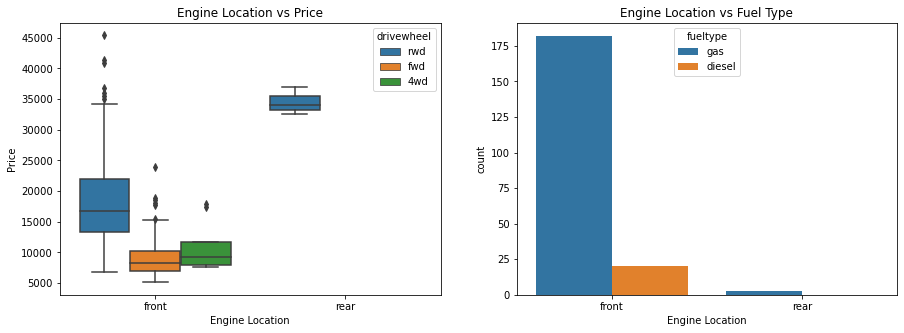

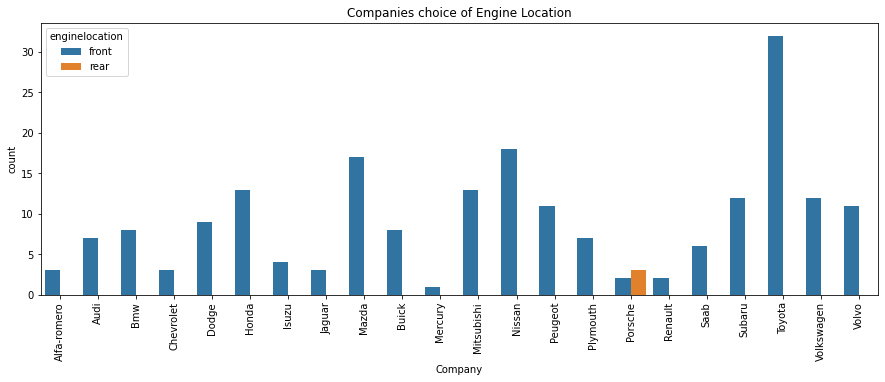

In [40]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(data=cars, x='enginelocation', y='price', hue='drivewheel')
plt.xlabel('Engine Location')
plt.ylabel('Price')
plt.title('Engine Location vs Price')

plt.subplot(1,2,2)
sns.countplot(data=cars, x='enginelocation', hue='fueltype')
plt.xlabel('Engine Location')
plt.title('Engine Location vs Fuel Type')
plt.show()

plt.figure(figsize = (15,5))
sns.countplot(data=cars, x='Company', hue='enginelocation')
plt.xlabel('Company')
plt.title('Companies choice of Engine Location')
plt.xticks(rotation=90)
plt.show()

### Inference:
1. Rear engine has only `rwd` drivetype.
2. Gas is used more in front engine cars. Diesel is not used in rear engine cars
3. **Porsche is the only company with rear engine**

### Wheel Base

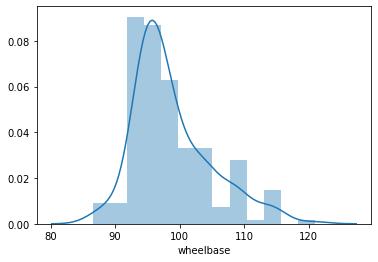

In [41]:
sns.distplot(cars['wheelbase'])

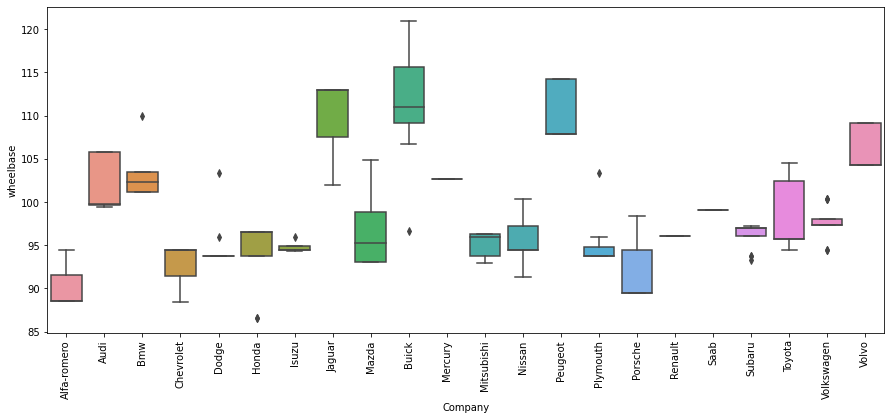

In [42]:
plt.figure(figsize = (15,6))
sns.boxplot(data=cars, x='Company', y = 'wheelbase')
plt.xticks(rotation =90)
plt.show()

**Different company has different wheelbase sizes**

### Car Length

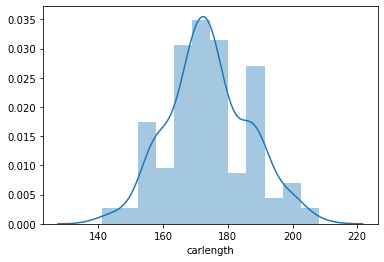

In [43]:
sns.distplot(cars['carlength'])
plt.show()

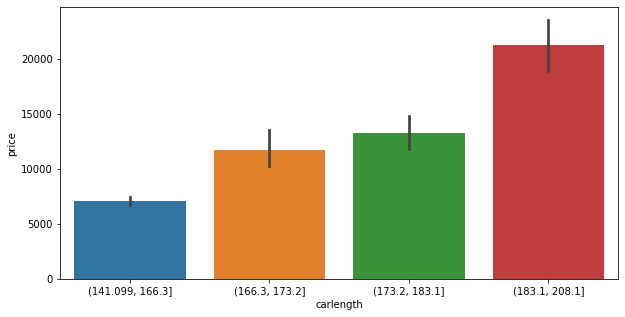

In [44]:
plt.figure(figsize=(10,5))
temp_c = pd.qcut(cars['carlength'],4) # Binning the length of cars
sns.barplot(temp_c,cars['price'])
plt.show()

**Price increases as Car length increases**

### Car Width

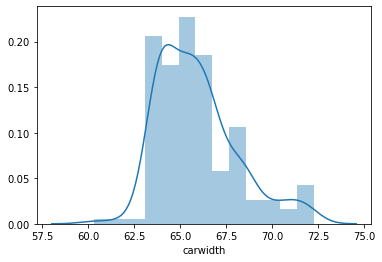

In [45]:
sns.distplot(cars['carwidth'])
plt.show()

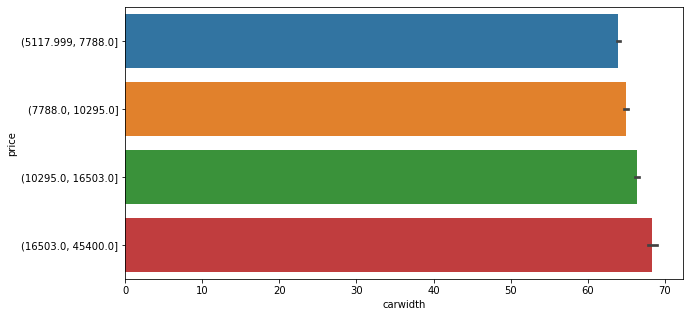

In [46]:
plt.figure(figsize=(10,5))
temp_p = pd.qcut(cars['price'],4) # Binning Car width
sns.barplot(cars['carwidth'],temp_p)
plt.show()

**Slight varaiation in the price as we come down the order**

### Car Height

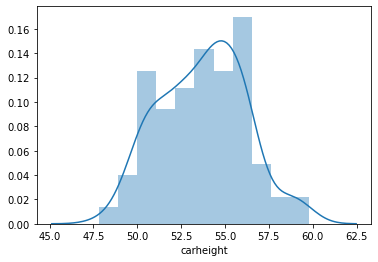

In [47]:
sns.distplot(cars['carheight'])
plt.show()

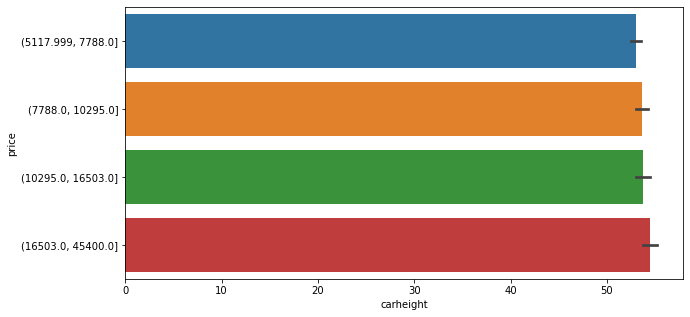

In [48]:
plt.figure(figsize=(10,5))
temp_p = pd.qcut(cars['price'],4) # Binning heights
sns.barplot(cars['carheight'],temp_p)
plt.show()

**No change in price with respect to car heights**

### Curbweight
> Dead weight of the car

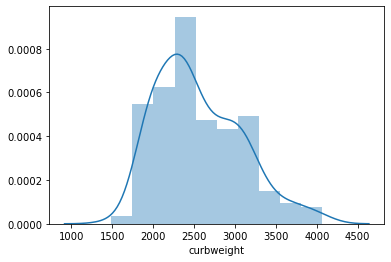

In [49]:
sns.distplot(cars['curbweight'])
plt.show()

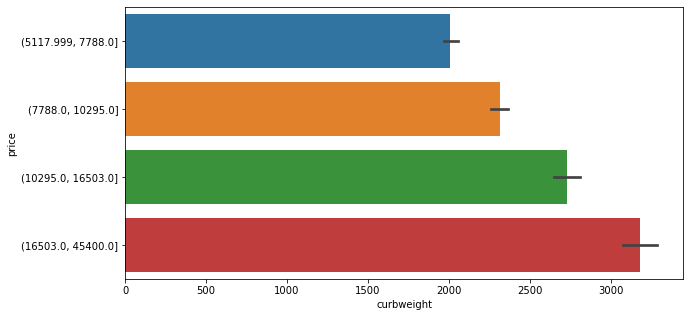

In [50]:
plt.figure(figsize=(10,5))
temp_p = pd.qcut(cars['price'],4)
sns.barplot(cars['curbweight'],temp_p)
plt.show()

**Price increases as weight increases**

### Engine Type

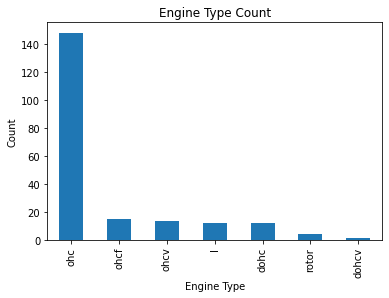

In [51]:
cars['enginetype'].value_counts().plot(kind='bar')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.title('Engine Type Count')
plt.show()

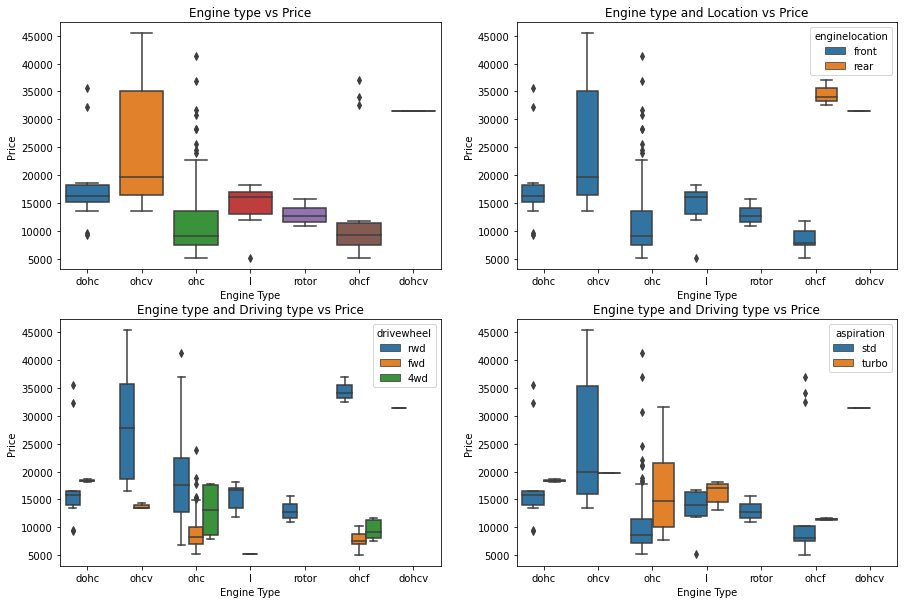

In [52]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(data=cars, x='enginetype', y ='price')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.title('Engine type vs Price')

plt.subplot(2,2,2)
sns.boxplot(data=cars, x='enginetype', y ='price', hue = 'enginelocation')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.title('Engine type and Location vs Price')

plt.subplot(2,2,3)
sns.boxplot(data=cars, x='enginetype', y ='price', hue = 'drivewheel')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.title('Engine type and Driving type vs Price')

plt.subplot(2,2,4)
sns.boxplot(data=cars, x='enginetype', y ='price', hue = 'aspiration')
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.title('Engine type and Driving type vs Price')
plt.show()

### Inference:
1. `ohcv` costs more.
2. `ohcf` is the only engine which is used in rear part of the car.
3. `ohc` and `l` uses two types of combustion.

### Cylinder Number

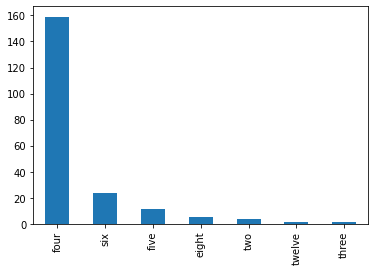

In [53]:
cars['cylindernumber'].value_counts().plot(kind='bar')
plt.show()

**4 cylinder cars are more**

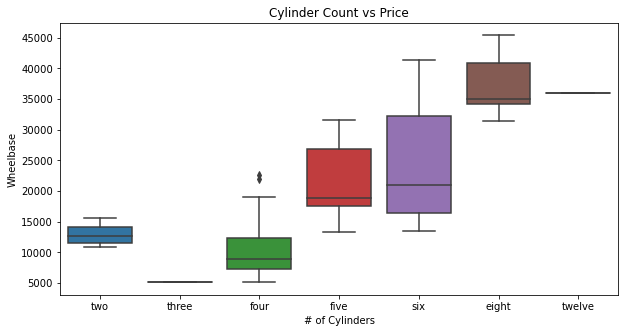

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(data=cars, x ='cylindernumber',y='price', order = ['two','three','four','five','six','eight','twelve'])
plt.xlabel('# of Cylinders')
plt.ylabel('Wheelbase')
plt.title('Cylinder Count vs Price')
plt.show()

**Price increases gradually when car has more than 4 cylinders**

### Engine Size

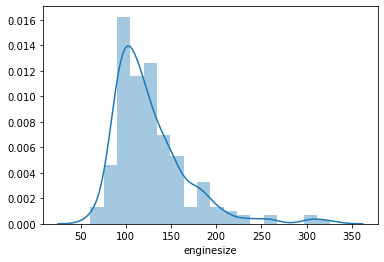

In [55]:
sns.distplot(cars['enginesize'])
plt.show()

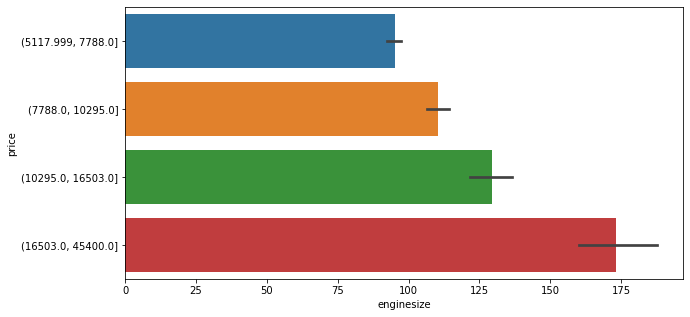

In [56]:
plt.figure(figsize=(10,5))
temp_p = pd.qcut(cars['price'],4) #Binning engine size
sns.barplot(cars['enginesize'],temp_p)
plt.show()

**Bigger the Engine higher the price**

### Fuel System

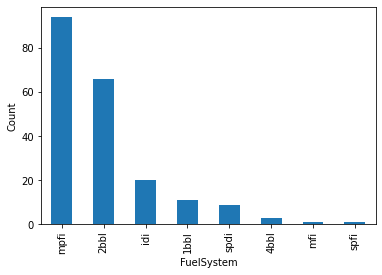

In [57]:
cars['fuelsystem'].value_counts().plot(kind='bar')
plt.xlabel('FuelSystem')
plt.ylabel('Count')
plt.show()

**mpfi costs more and spfi costs less**

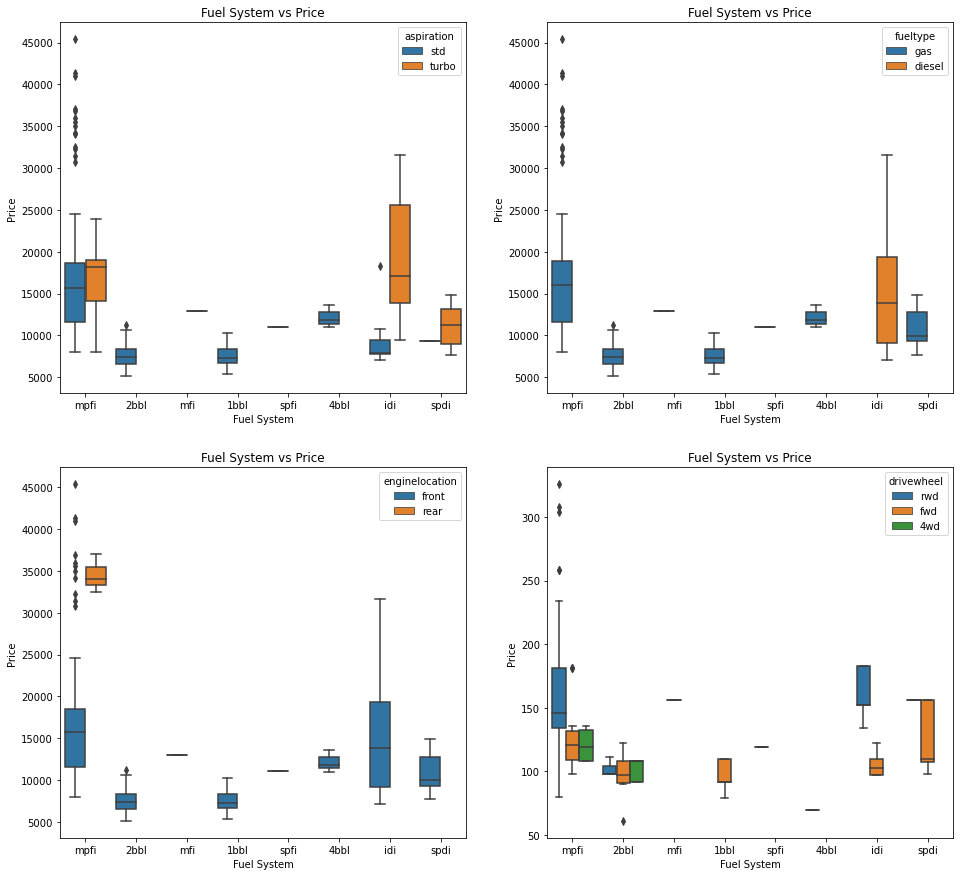

In [58]:
plt.figure(figsize = (16,15))

plt.subplot(2,2,1)
sns.boxplot(data=cars,x='fuelsystem',y='price', hue = 'aspiration')
plt.xlabel('Fuel System')
plt.ylabel('Price')
plt.title('Fuel System vs Price')

plt.subplot(2,2,2)
sns.boxplot(data=cars,x='fuelsystem',y='price', hue ='fueltype')
plt.xlabel('Fuel System')
plt.ylabel('Price')
plt.title('Fuel System vs Price')

plt.subplot(2,2,3)
sns.boxplot(data=cars,x='fuelsystem',y='price', hue = 'enginelocation')
plt.xlabel('Fuel System')
plt.ylabel('Price')
plt.title('Fuel System vs Price')

plt.subplot(2,2,4)
sns.boxplot(data=cars,x='fuelsystem',y='enginesize', hue = 'drivewheel')
plt.xlabel('Fuel System')
plt.ylabel('Price')
plt.title('Fuel System vs Price')

plt.show()

- `idi` fuelsystem is used only in diesel cars.
- `mpfi` fuelsystem is be used in rear enginelocation

### Bore Ratio

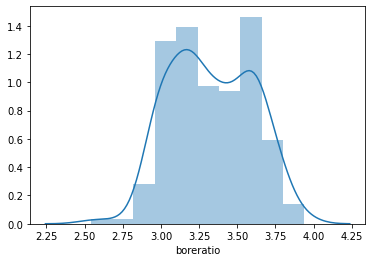

In [59]:
sns.distplot(cars['boreratio'])
plt.show()

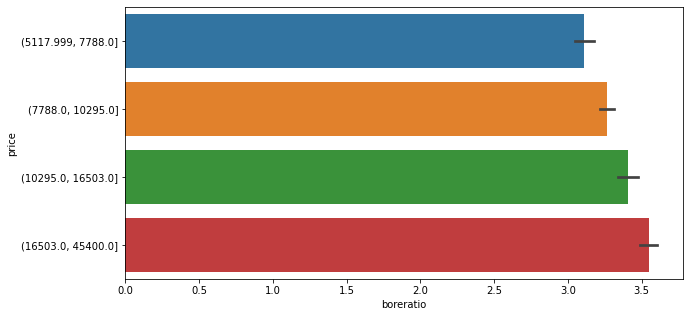

In [60]:
plt.figure(figsize=(10,5))
temp_p = pd.qcut(cars['price'],4)
sns.barplot(cars['boreratio'],temp_p)
plt.show()

**Price increases as boreratio increases**

### Stroke

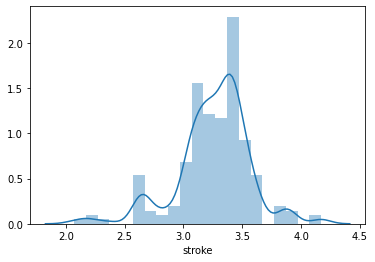

In [61]:
sns.distplot(cars['stroke'])
plt.show()

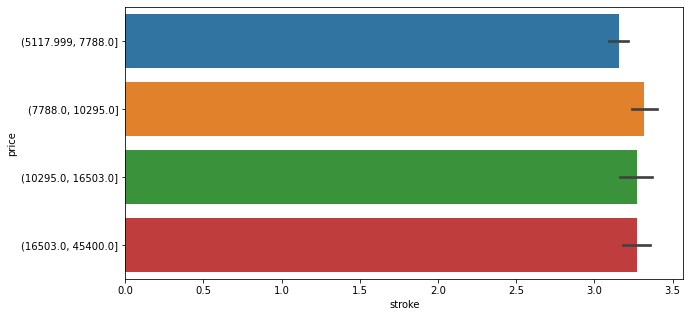

In [62]:
plt.figure(figsize=(10,5))
temp_p = pd.qcut(cars['price'],4)
sns.barplot(cars['stroke'],temp_p)
plt.show()

### Compression Ratio

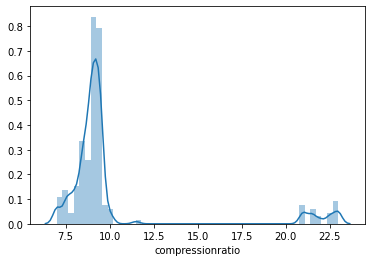

In [63]:
sns.distplot(cars['compressionratio'])
plt.show()

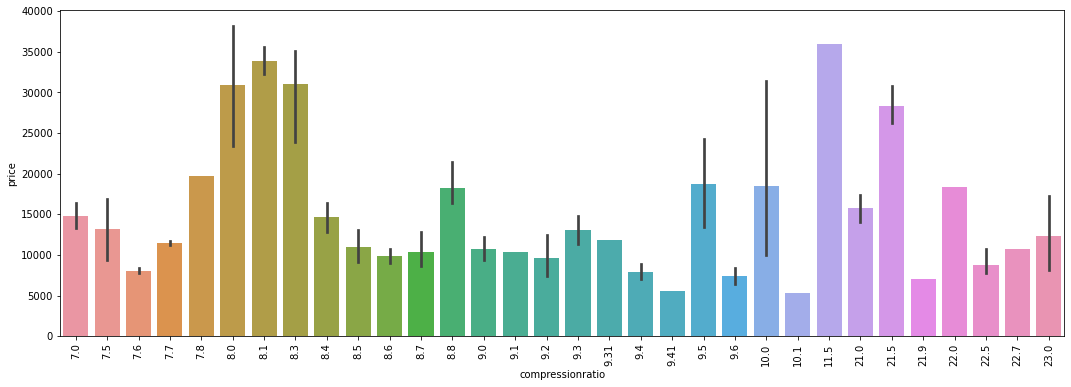

In [64]:
plt.figure(figsize=(18,6))
sns.barplot(data=cars,x='compressionratio',y='price')
plt.xticks(rotation=90)
plt.show()

### Horse Power

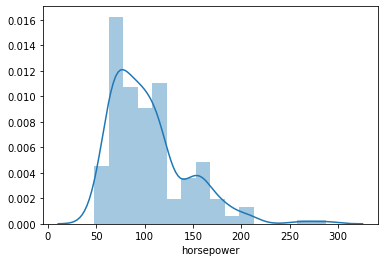

In [65]:
sns.distplot(cars['horsepower'])
plt.show()

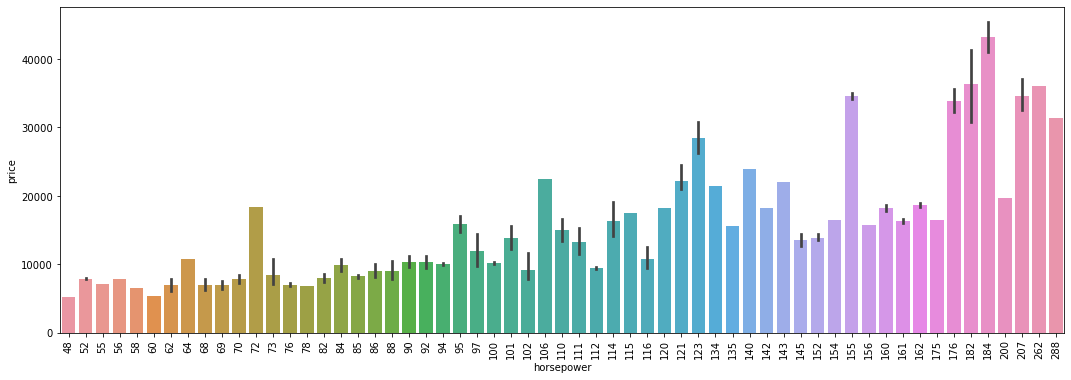

In [66]:
plt.figure(figsize=(18,6))
sns.barplot(data=cars,x='horsepower',y='price')
plt.xticks(rotation=90)
plt.show()

**Price increase gradually when horse power increases**

### RPM

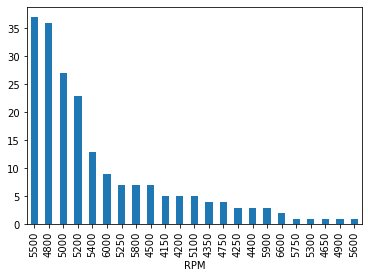

In [67]:
cars['peakrpm'].value_counts().plot(kind='bar')
plt.xlabel('RPM')
plt.show()

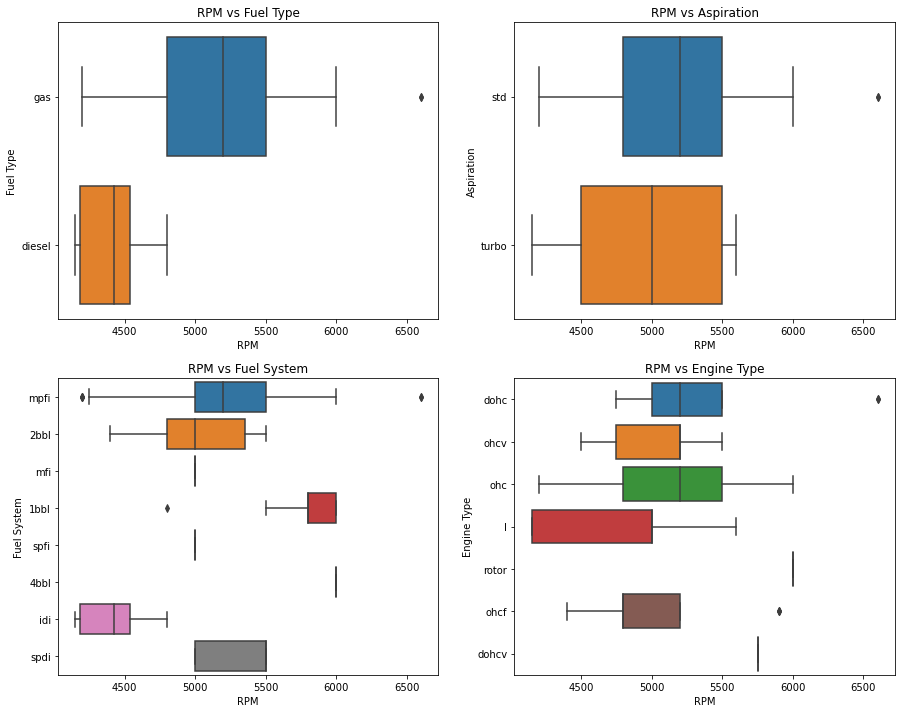

In [68]:
plt.figure(figsize = (15,12))

plt.subplot(2,2,1)
sns.boxplot(data=cars,x='peakrpm', y='fueltype')
plt.xlabel('RPM')
plt.ylabel('Fuel Type')
plt.title('RPM vs Fuel Type')

plt.subplot(2,2,2)
sns.boxplot(data=cars,x='peakrpm', y='aspiration')
plt.xlabel('RPM')
plt.ylabel('Aspiration')
plt.title('RPM vs Aspiration')

plt.subplot(2,2,3)
sns.boxplot(data=cars,x='peakrpm', y='fuelsystem')
plt.xlabel('RPM')
plt.ylabel('Fuel System')
plt.title('RPM vs Fuel System')

plt.subplot(2,2,4)
sns.boxplot(data=cars,x='peakrpm', y='enginetype')
plt.xlabel('RPM')
plt.ylabel('Engine Type')
plt.title('RPM vs Engine Type')
plt.show()

- Gas fuelsystem has higher RPM.

In [69]:
temp = pd.qcut(cars['peakrpm'],4)

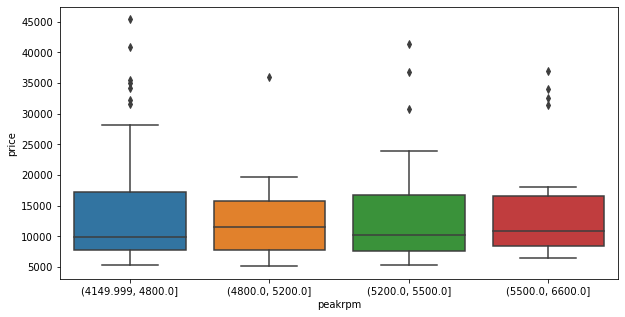

In [70]:
plt.figure(figsize = (10,5))
sns.boxplot(data=cars,x=temp,y='price')
plt.show()

**No Change in price**

### Mileage

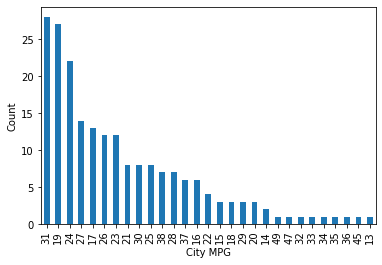

In [71]:
cars['citympg'].value_counts().plot(kind='bar')
plt.xlabel('City MPG')
plt.ylabel('Count')
plt.show()

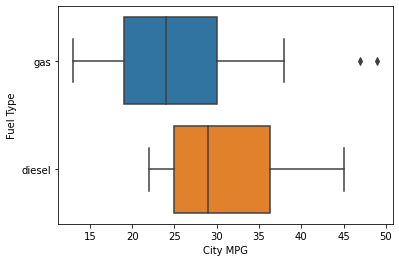

In [72]:
sns.boxplot(data=cars,x='citympg', y= 'fueltype')
plt.xlabel('City MPG')
plt.ylabel('Fuel Type')
plt.show()

**Diesel cars gives more mileage than gas in city**

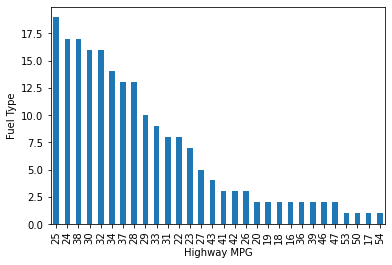

In [73]:
cars['highwaympg'].value_counts().plot(kind='bar')
plt.xlabel('Highway MPG')
plt.ylabel('Fuel Type')
plt.show()

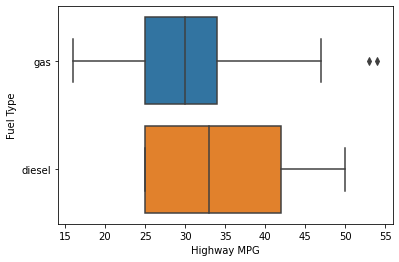

In [74]:
sns.boxplot(data=cars,x='highwaympg', y= 'fueltype')
plt.xlabel('Highway MPG')
plt.ylabel('Fuel Type')
plt.show()

**Diesel car offers good mileage in both city and hoghway**

## Numerical Analysis

In [75]:
#Let us drop id column, we do not need in our analysis

cars.drop(['car_ID'], axis = 1, inplace = True)
cars.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,Alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,Alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,Alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,Audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,Audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [76]:
# Analysis on Numerical data

cars_numeric = cars._get_numeric_data() #_get_numeric_data() method gets data with int and float dtypes

In [77]:
cars_numeric.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


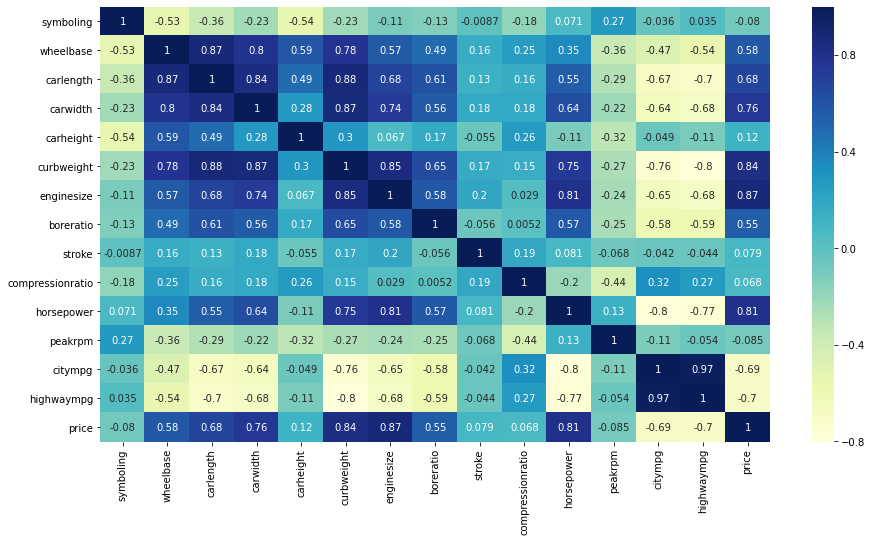

In [78]:
plt.figure(figsize = (15,8))
sns.heatmap(cars_numeric.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

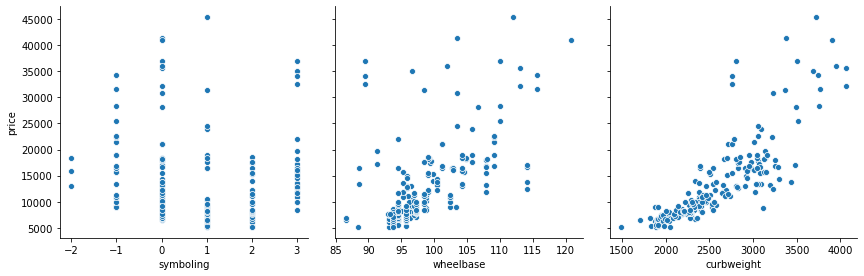

In [79]:
sns.pairplot(data=cars,x_vars=['symboling','wheelbase','curbweight'], y_vars='price',size=4, aspect=1,kind='scatter')
plt.show()

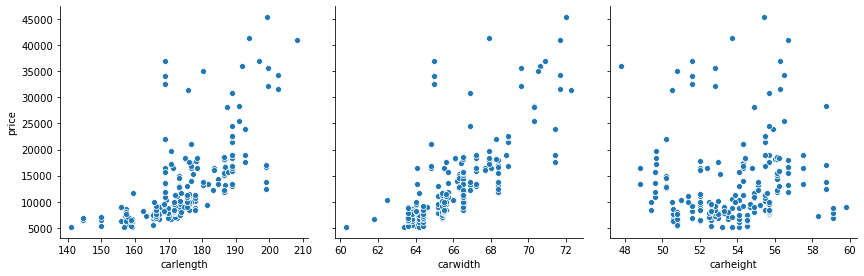

In [80]:
sns.pairplot(data=cars,x_vars=['carlength','carwidth','carheight'], y_vars='price',size=4, aspect=1,kind='scatter')
plt.show()

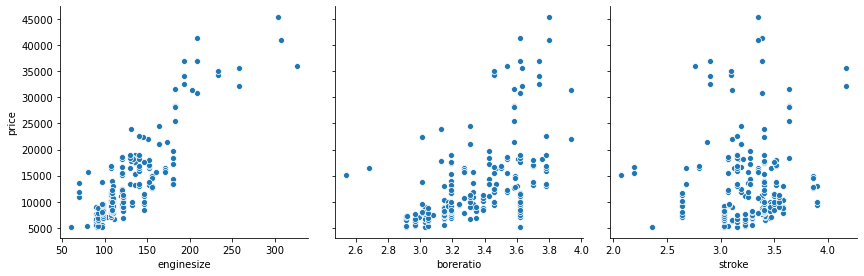

In [81]:
sns.pairplot(data=cars,x_vars=['enginesize','boreratio','stroke'], y_vars='price',size=4, aspect=1,kind='scatter')
plt.show()

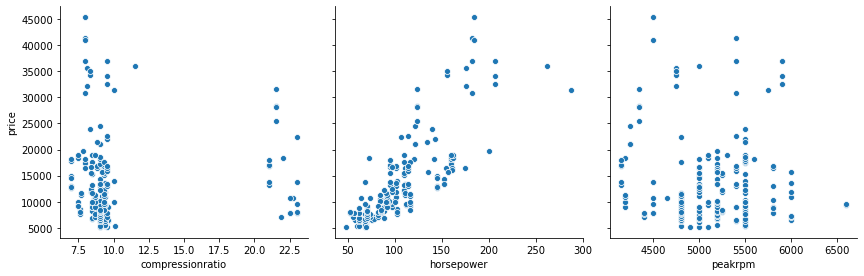

In [82]:
sns.pairplot(data=cars,x_vars=['compressionratio','horsepower','peakrpm'], y_vars='price',size=4, aspect=1,kind='scatter')
plt.show()

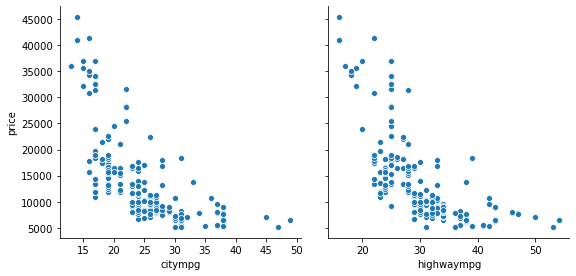

In [83]:
sns.pairplot(data=cars,x_vars=['citympg','highwaympg'], y_vars='price',size=4, aspect=1,kind='scatter')
plt.show()

- carlength and wheelbase are highly correlated - Remove Wheelbase
- carwidth and carlength are highly correlated - Remove Carwidth
- curbweight and carlength are highly correlated - Remove curbweight
- carwidth and wheelbase are highly correlated
- curbweight and carwidth are highly correlated

- citympg and highwaympg are very highly correlated - Remove both varaibales as they have less correlation to `price`

Numerical columns to consider are:
`carlength`,`enginesize`,`boreratio`,`horsepower`.

All of these column shows a linear relation to the target variable `price`

Since citympg and highwaympg shows negative relation to price, we can drop the columns.
And also peakrpm, stroke and compression ratio shows no linear relation to target variable, it is safe to drop the columns

In [84]:
cars_numeric = cars_numeric.drop(['carheight','carwidth','curbweight','wheelbase'],axis =1)

In [85]:
cars_numeric = cars_numeric.drop(columns = ['citympg','highwaympg','compressionratio','stroke', 'peakrpm'],axis =1)

In [86]:
cars_numeric.columns

Index(['symboling', 'carlength', 'enginesize', 'boreratio', 'horsepower',
       'price'],
      dtype='object')

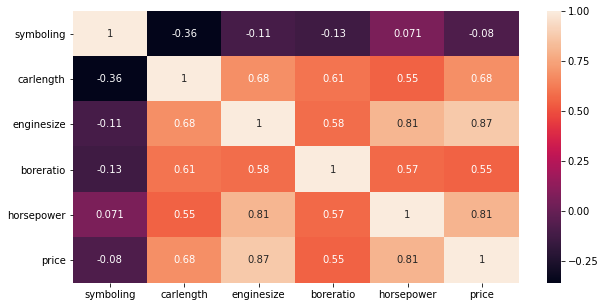

In [87]:
plt.figure(figsize=(10,5))
sns.heatmap(cars_numeric.corr(),annot=True)
plt.show()

### Categorical Analysis

In [88]:
cars_cat = cars.select_dtypes(include=['object']) #cars_cat is the categorical dataframe

In [89]:
cars_cat.head()

,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,Alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,Alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,Alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,Audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,Audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


### Mapping Values

Let us create a range for the prices of the car

In [90]:
cars_cat['range'] = cars_numeric['price'].copy()

In [91]:
cars_cat['range'].head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: range, dtype: float64

In [92]:
def vals(x):
    if x<12000:
        return "Low"
    if x>=12000 and x<25000:
        return "Medium"
    if x>=25000 and x<=46000:
        return "High"
    
cars_cat['range'] = cars_cat['range'].apply(vals)

In [93]:
cars_cat.head()

,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,range
0,Alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
1,Alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,Medium
2,Alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium
3,Audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Medium
4,Audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,Medium


### Creating Dummy Variables

In [94]:
dummy1 = pd.get_dummies(cars_cat['fueltype'],prefix='fueltype',drop_first=True)
dummy2 = pd.get_dummies(cars_cat['aspiration'],prefix='aspiration',drop_first=True)
dummy3 = pd.get_dummies(cars_cat['carbody'],prefix = 'carbody',drop_first=True)
dummy4 = pd.get_dummies(cars_cat['drivewheel'],prefix='drivewheel',drop_first=True)
dummy5 = pd.get_dummies(cars_cat['enginelocation'],prefix ='enginelocation',drop_first=True)
dummy6 = pd.get_dummies(cars_cat['enginetype'],prefix='enginetype',drop_first=True)
dummy7 = pd.get_dummies(cars_cat['cylindernumber'], prefix = 'cylinder', drop_first=True)
dummy8 = pd.get_dummies(cars_cat['fuelsystem'],prefix='fuelsystem',drop_first=True)
dummy9 = pd.get_dummies(cars_cat['doornumber'],prefix='door', drop_first=True)
dummy10 = pd.get_dummies(cars_cat['range'], drop_first=True)

In [95]:
cars_lr = pd.concat([cars_numeric,dummy1,dummy2,dummy3,dummy4,dummy5,dummy6,dummy7,dummy8,dummy9,dummy10], axis = 1)
cars_lr.head()

,symboling,carlength,enginesize,boreratio,horsepower,price,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,...,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,door_two,Low,Medium
0,3,168.8,130,3.47,111,13495.0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
1,3,168.8,130,3.47,111,16500.0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,1,171.2,152,2.68,154,16500.0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
3,2,176.6,109,3.19,102,13950.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2,176.6,136,3.19,115,17450.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [96]:
cars_lr.columns

Index(['symboling', 'carlength', 'enginesize', 'boreratio', 'horsepower',
       'price', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylinder_five', 'cylinder_four', 'cylinder_six',
       'cylinder_three', 'cylinder_twelve', 'cylinder_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'door_two',
       'Low', 'Medium'],
      dtype='object')

### Train Test Split

In [97]:
from sklearn.model_selection import train_test_split # splitting data for modeling

In [98]:
df_train,df_test = train_test_split(cars_lr,train_size=0.7,random_state=15) # 70% Training which implies 30 percent testing

### Scaling

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [100]:
cars_numeric.columns

Index(['symboling', 'carlength', 'enginesize', 'boreratio', 'horsepower',
       'price'],
      dtype='object')

In [101]:
num_vars = ['symboling', 'carlength', 'enginesize', 'boreratio','horsepower', 'price']

In [102]:
df_train[num_vars]

,symboling,carlength,enginesize,boreratio,horsepower,price
180,-1,187.8,171,3.27,156,15690.0
91,1,165.3,97,3.15,69,6649.0
108,0,186.7,152,3.70,95,13200.0
173,-1,175.6,122,3.31,92,8948.0
185,2,171.7,109,3.19,85,8195.0
...,...,...,...,...,...,...
128,3,168.9,194,3.74,207,37028.0
119,1,157.3,98,3.03,102,7957.0
133,2,186.6,121,3.54,110,12170.0
140,2,157.3,108,3.62,73,7603.0


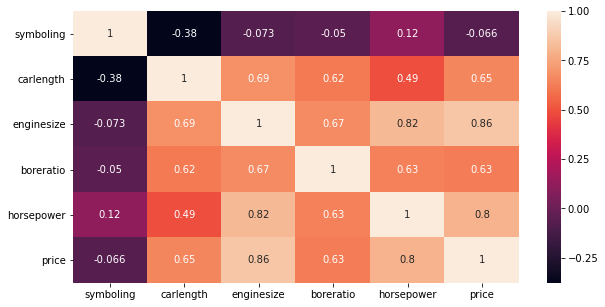

In [103]:
# Correlation plot of the considered numerical values

plt.figure(figsize=(10,5))
sns.heatmap(df_train[num_vars].corr(),annot = True)
plt.show()

In [104]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars]) # Scaling all the numerical values

In [105]:
df_train.columns

Index(['symboling', 'carlength', 'enginesize', 'boreratio', 'horsepower',
       'price', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylinder_five', 'cylinder_four', 'cylinder_six',
       'cylinder_three', 'cylinder_twelve', 'cylinder_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'door_two',
       'Low', 'Medium'],
      dtype='object')

In [106]:
y_train = df_train.pop('price') # Assigning the target variable to y_train and other columns to X_train
X_train = df_train

In [107]:
# Importing Linear Regression and RFE

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [108]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [109]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 19),
 ('carlength', True, 1),
 ('enginesize', False, 17),
 ('boreratio', False, 14),
 ('horsepower', True, 1),
 ('fueltype_gas', False, 16),
 ('aspiration_turbo', False, 15),
 ('carbody_hardtop', False, 2),
 ('carbody_hatchback', False, 3),
 ('carbody_sedan', False, 4),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 10),
 ('drivewheel_rwd', False, 22),
 ('enginelocation_rear', False, 11),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 7),
 ('enginetype_ohc', False, 6),
 ('enginetype_ohcf', False, 5),
 ('enginetype_ohcv', False, 13),
 ('enginetype_rotor', True, 1),
 ('cylinder_five', True, 1),
 ('cylinder_four', True, 1),
 ('cylinder_six', True, 1),
 ('cylinder_three', True, 1),
 ('cylinder_twelve', False, 25),
 ('cylinder_two', False, 9),
 ('fuelsystem_2bbl', False, 18),
 ('fuelsystem_4bbl', False, 8),
 ('fuelsystem_idi', False, 21),
 ('fuelsystem_mfi', True, 1),
 ('fuelsystem_mpfi', False, 24),
 ('fuelsystem_spdi', False, 12),
 ('fuelsystem_spf

In [110]:
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'horsepower', 'carbody_wagon', 'enginetype_dohcv',
       'enginetype_rotor', 'cylinder_five', 'cylinder_four', 'cylinder_six',
       'cylinder_three', 'fuelsystem_mfi', 'Low', 'Medium'],
      dtype='object')

In [111]:
X_train.columns[~rfe.support_]

Index(['symboling', 'enginesize', 'boreratio', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylinder_twelve', 'cylinder_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'door_two'],
      dtype='object')

## Building model using stats model

In [112]:
X_train_rfe = X_train[col] # Assigning the selected columns via rfe to X_train_rfe column

In [113]:
X_train_rfe.describe().T # shows all the columns are scaled between 0 to 1

,count,mean,std,min,25%,50%,75%,max
carlength,143.0,0.491462,0.184201,0.0,0.376119,0.479104,0.616418,1.0
horsepower,143.0,0.233829,0.164846,0.0,0.091667,0.195833,0.283333,1.0
carbody_wagon,143.0,0.139860,0.348061,0.0,0.000000,0.000000,0.000000,1.0
enginetype_dohcv,143.0,0.006993,0.083624,0.0,0.000000,0.000000,0.000000,1.0
enginetype_rotor,143.0,0.006993,0.083624,0.0,0.000000,0.000000,0.000000,1.0
cylinder_five,143.0,0.062937,0.243703,0.0,0.000000,0.000000,0.000000,1.0
cylinder_four,143.0,0.783217,0.413502,0.0,1.000000,1.000000,1.000000,1.0
cylinder_six,143.0,0.125874,0.332873,0.0,0.000000,0.000000,0.000000,1.0
cylinder_three,143.0,0.006993,0.083624,0.0,0.000000,0.000000,0.000000,1.0
fuelsystem_mfi,143.0,0.006993,0.083624,0.0,0.000000,0.000000,0.000000,1.0


In [114]:
# Adding constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [115]:
# Fitting the model
lm = sm.OLS(y_train,X_train_rfe).fit()

**Assumptions**

- If `p-value` is more than 0.05, drop the variable.
- If `vif` > 10, drop the variable. If `vif` is also greater than 5, drop it (depends on the business strategies)

In [116]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     144.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           6.98e-69
Time:                        21:39:15   Log-Likelihood:                 205.87
No. Observations:                 143   AIC:                            -385.7
Df Residuals:                     130   BIC:                            -347.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6584      0.081  

In [117]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,260.17
7,cylinder_four,30.82
8,cylinder_six,18.49
11,Low,10.94
6,cylinder_five,10.47
12,Medium,5.42
2,horsepower,4.39
9,cylinder_three,2.52
1,carlength,2.50
4,enginetype_dohcv,2.34


**Dropping enginetype_rotor variable because of high p value**

In [118]:
X_train_new = X_train_rfe.drop(['enginetype_rotor'], axis = 1)

**Repeating the process of identifying the significant variable**

In [119]:
# Adding constant variable
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train_new)

In [120]:
lm = sm.OLS(y_train,X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     157.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           8.72e-70
Time:                        21:39:15   Log-Likelihood:                 205.35
No. Observations:                 143   AIC:                            -386.7
Df Residuals:                     131   BIC:                            -351.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6117      0.066  

In [121]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,170.11
6,cylinder_four,13.99
10,Low,10.65
7,cylinder_six,9.33
5,cylinder_five,5.57
11,Medium,5.17
2,horsepower,4.38
1,carlength,2.45
4,enginetype_dohcv,1.87
8,cylinder_three,1.74


**Dropping cylinder_three because of high p-value**

In [122]:
X_train_new = X_train_new.drop(['cylinder_three'], axis = 1)

In [123]:
# Adding constant variable
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.4
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.16e-70
Time:                        21:39:15   Log-Likelihood:                 204.70
No. Observations:                 143   AIC:                            -387.4
Df Residuals:                     132   BIC:                            -354.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5712      0.054  

In [124]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,115.34
9,Low,10.57
6,cylinder_four,8.74
7,cylinder_six,6.73
10,Medium,5.17
2,horsepower,4.23
5,cylinder_five,4.00
1,carlength,2.26
4,enginetype_dohcv,1.76
3,carbody_wagon,1.19


**Dropping cylinder_six : high p-value**

In [125]:
X_train_new = X_train_new.drop(['cylinder_six'], axis = 1)

In [126]:
# Adding constant variable
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.43e-71
Time:                        21:39:15   Log-Likelihood:                 203.52
No. Observations:                 143   AIC:                            -387.0
Df Residuals:                     133   BIC:                            -357.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5290      0.046  

In [127]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,83.45
8,Low,10.57
9,Medium,5.16
2,horsepower,4.05
6,cylinder_four,2.71
1,carlength,2.26
5,cylinder_five,1.68
4,enginetype_dohcv,1.32
3,carbody_wagon,1.19
7,fuelsystem_mfi,1.05


**Dropping fuelsystem_mfi: high p-value**

In [128]:
X_train_new = X_train_new.drop(['fuelsystem_mfi'], axis = 1)

In [129]:
# Adding constant variable
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     211.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.89e-72
Time:                        21:39:15   Log-Likelihood:                 202.32
No. Observations:                 143   AIC:                            -386.6
Df Residuals:                     134   BIC:                            -360.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5309      0.046  

In [130]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,83.39
7,Low,10.56
8,Medium,5.15
2,horsepower,3.99
6,cylinder_four,2.66
1,carlength,2.24
5,cylinder_five,1.68
4,enginetype_dohcv,1.31
3,carbody_wagon,1.19


**Dropping cylinder_five: high p-value**

In [131]:
X_train_new = X_train_new.drop(['cylinder_five'], axis = 1)

In [132]:
# Adding constant variable
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     236.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.62e-72
Time:                        21:39:15   Log-Likelihood:                 200.54
No. Observations:                 143   AIC:                            -385.1
Df Residuals:                     135   BIC:                            -361.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4967      0.043  

In [133]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,69.95
6,Low,9.99
7,Medium,5.00
2,horsepower,3.24
1,carlength,2.20
5,cylinder_four,2.08
4,enginetype_dohcv,1.31
3,carbody_wagon,1.19


**Dropping cylinder_four: high p-value**

In [134]:
X_train_new = X_train_new.drop(['cylinder_four'], axis = 1)

In [135]:
# Adding constant variable
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     275.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.79e-73
Time:                        21:39:15   Log-Likelihood:                 199.85
No. Observations:                 143   AIC:                            -385.7
Df Residuals:                     136   BIC:                            -365.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4907      0.043  

In [136]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.93
5,Low,8.36
6,Medium,4.23
2,horsepower,3.04
1,carlength,2.19
4,enginetype_dohcv,1.29
3,carbody_wagon,1.19


**Dropping enginetype_dohcv: There is only 1 entry in the dataset with this enginetype, so it is better to drop the variable**

In [137]:
X_train_new = X_train_new.drop(['enginetype_dohcv'], axis = 1)

In [138]:
# Adding constant variable
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_new).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     316.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.06e-73
Time:                        21:39:15   Log-Likelihood:                 196.61
No. Observations:                 143   AIC:                            -381.2
Df Residuals:                     137   BIC:                            -363.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4968      0.043     11.466

In [139]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.70
4,Low,8.34
5,Medium,4.22
2,horsepower,2.57
1,carlength,2.15
3,carbody_wagon,1.18


### Inference:
Dropping variable `Low` makes no sense as most of the car prices are in that bucket. Even if Vif(Low) >5, we shall keep the varaible as it is crucial in identifying the customer interests

# Residual analysis

In [140]:
# Let us fit the model with final variables
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

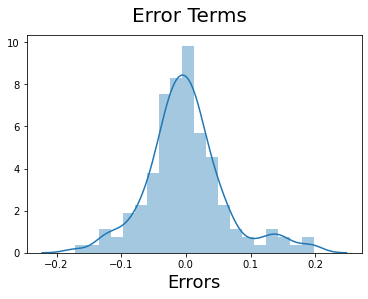

In [141]:
# Plot of the Residuals
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

**`Error Terms` are normally distributed (Mean is 0)**

In [142]:
num_vars

['symboling', 'carlength', 'enginesize', 'boreratio', 'horsepower', 'price']

In [143]:
#Scaling the test set
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [144]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [145]:
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [146]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [147]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.9061451620178744

In [148]:
# Finding RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.06304085951362333

Text(0, 0.5, 'y_pred')

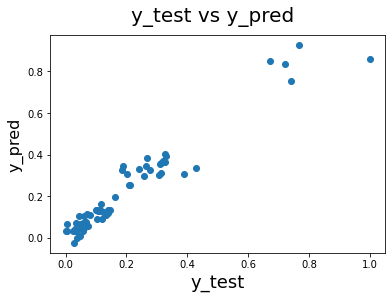

In [149]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

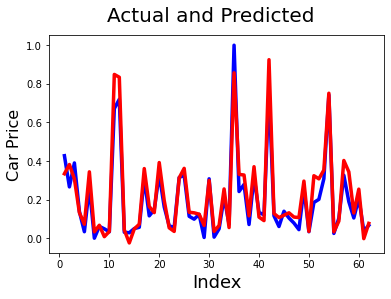

In [150]:
#Actualvs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)
plt.show()

**Pretty good model to be honest**

### Even though we have achieved R squared 90% in prediction, the model is biased as we have set price buckets. And we have dropped some of the highly correlated varaiables

In [151]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     316.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.06e-73
Time:                        21:39:16   Log-Likelihood:                 196.61
No. Observations:                 143   AIC:                            -381.2
Df Residuals:                     137   BIC:                            -363.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4968      0.043     11.466

> The important variables to consider are as follow:

- `carlength`
- `horsepower`
- if bodytype is `carbody_wagon`
- and finally if the cost of the car is `Low` or `Medium`

### Final Inference
- All the predictor variables are having p value less than 0.05, hence all the variables are statistically significant.
- R squared of 92 % and Adj R squared of 91.7% is achieved. Hence 91% variance is explained in the model.
- R squared of 90% is achieved in test data.
- Fit of the model F-statistic: 316.7 and Prob (F-statistic): 2.06e-73 is almost 0.
- RMSE: 0.063